<font size="5" color="red">ch4. 머신러닝 모형 최적화</font>
# 1절. 변수 선택과 차원 축소
## 1-1 변수 선택과 차원 축소
- 종속변수에 영향을 주는 변수들만 찾아 학습에 사용할 독립변수의 수를 줄이는 게 목적
- 어떻게 하면 score를 높일 수 있을지가 목적
- 과적합과 독립변수들 사이의 다중공선성을 줄일 수 있음
- 모형의 학습 시간을 줄일 수 있음
- 주성분 분석, 상관 분석, 분류모형의 feature_importance_, SelectKBest.. 등 이용

## 1-2 주성분 분석(PCA, Principal Component Anaysis)
- 상관관계가 있는 변수들을 선형 결합해서 상관관계가 없는 새로운 변수(주성분)로 축약하는 것

In [4]:
import seaborn as sns
from sklearn.decomposition import PCA
iris = sns.load_dataset('iris')
iris_X, iris_y = iris.iloc[:, :-1], iris.species

# PCA 객체 생성
pca = PCA(n_components = 2) # 주성분 개수
pca.fit(iris_X)

# 다중공선성 없애고, 독립변수 2개로 줄임
iris_pca = pca.transform(iris_X) 
iris_pca[::50]

array([[-2.68412563,  0.31939725],
       [ 1.28482569,  0.68516047],
       [ 2.53119273, -0.00984911]])

In [5]:
# 설명 분산
# 실제 변수의 분산값
pca.explained_variance_

array([4.22824171, 0.24267075])

In [9]:
# 설명 분산을 0 ~ 1 사이의 비율로 나타낸 값
# 각각의 새로운 변수가 원래의 독립변수(4개)를 얼마나 잘 설명하는지 그 정도를 의미
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [6]:
# 각 주성분의 계수
pca.components_ 

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [8]:
iris_X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

## 1-3 상관관계 확인
- 종속변수와 상관관계가 높은 변수들과 독립변수들끼리의 상관관계를 탐색

In [11]:
import pandas as pd
# delimiter: 구분자; sep도 가능
redwine = pd.read_csv('winequality-red.csv', delimiter = ';') 
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


cmap: https://matplotlib.org/stable/users/explain/colors/colormaps.html <br>
heatmap: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

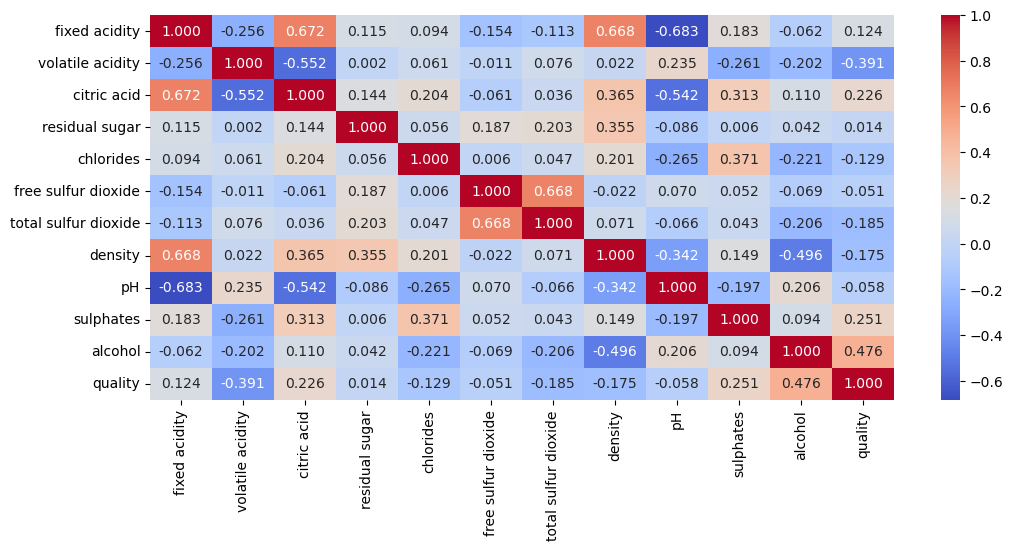

In [21]:
# 상관관계
corr = redwine.corr()
plt.figure(figsize = (12, 5))
sns.heatmap(corr, 
            annot = True, 
            cmap  = 'coolwarm', 
            fmt   = '.3f')
plt.show()

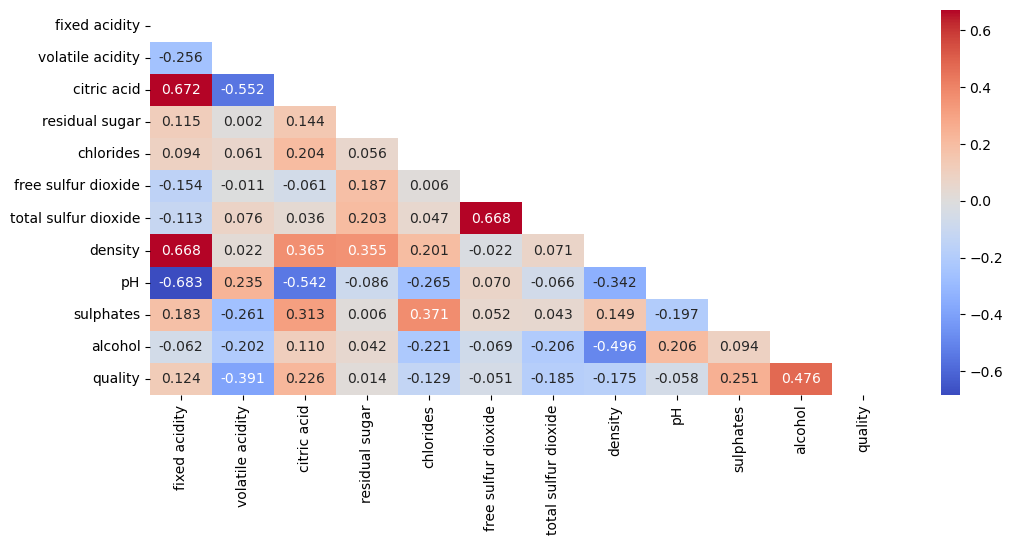

In [27]:
# Generate a mask for the upper triangle
plt.figure(figsize = (12, 5))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, 
            annot = True, 
            cmap  = 'coolwarm', 
            fmt   = '.3f',
            mask  = mask)
plt.show()

## 1-4 분류 모형의  feature_importances_
- 분류 모형의 feature_importances_ 속성은 각 독립변수들이 종속변수에 영향을 주는 정도

In [28]:
X = redwine.iloc[:, :-1]
y = redwine.quality
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .3)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((1119, 11), (480, 11), (1119,), (480,))

In [31]:
# RandomForestClassifier: 의사결정나무 여러 개
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 10, # 의사결정나무 수
                                  random_state = 10, # seed 값
                                 )
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [32]:
rf_model.feature_importances_

array([0.08126805, 0.09615766, 0.06947042, 0.07793109, 0.08215211,
       0.07130363, 0.10597401, 0.09488073, 0.06967902, 0.10678511,
       0.14439816])

In [35]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [42]:
# 컬럼별 중요도를 데이터프레임으로
features = pd.DataFrame(data    = np.c_[X.columns, rf_model.feature_importances_],
                        columns = ['feature', 'importance'])
# 중요도 순으로 내림차순 정렬
features.sort_values(by = 'importance', ascending = False, inplace = True)
features.reset_index(drop = True, inplace = True)
features.set_index(drop = True, keys = 'feature')

,importance
feature,
alcohol,0.144398
sulphates,0.106785
total sulfur dioxide,0.105974
volatile acidity,0.096158
density,0.094881
chlorides,0.082152
fixed acidity,0.081268
residual sugar,0.077931
free sulfur dioxide,0.071304


In [43]:
features

,feature,importance
0,alcohol,0.144398
1,sulphates,0.106785
2,total sulfur dioxide,0.105974
3,volatile acidity,0.096158
4,density,0.094881
5,chlorides,0.082152
6,fixed acidity,0.081268
7,residual sugar,0.077931
8,free sulfur dioxide,0.071304
9,pH,0.069679


### feature_importances_를 이용한 변수 중요도 시각화

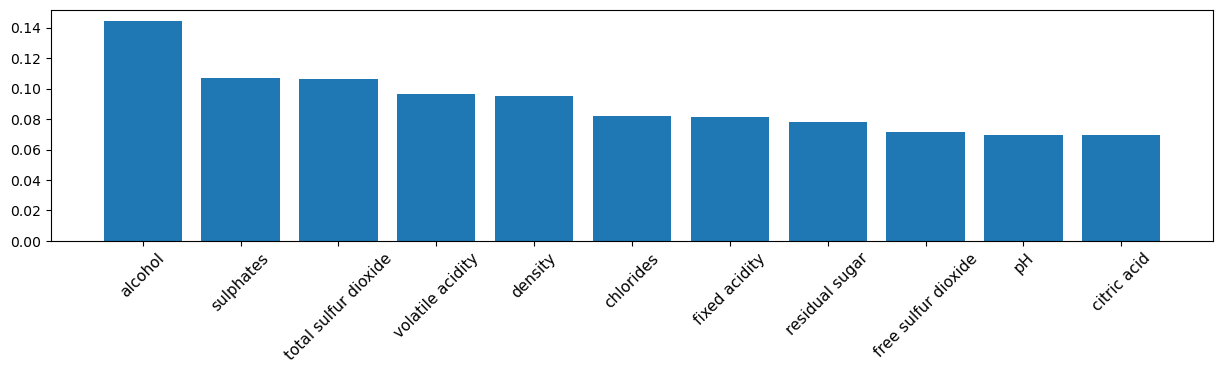

In [44]:
plt.figure(figsize = (15, 3))
plt.bar(features.feature, features.importance)
plt.xticks(rotation = 45, fontsize = 11)
plt.show()

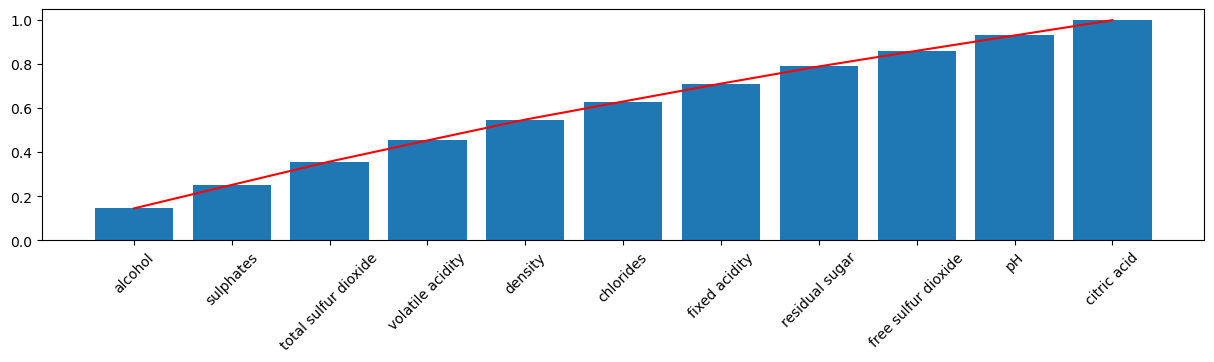

In [51]:
# feature_importances_를 누적 시각화
# 누적합은 1
y_stack = np.cumsum(features.importance)
plt.figure(figsize = (15, 3))
plt.bar(features.feature, y_stack)
plt.plot(features.feature, y_stack, color = "red")
plt.xticks(rotation = 45)
plt.show()

### RFE(Recursive Feature Elimination) 방식
- RFE 클래스를 이용하면 중요도가 낮은 변수부터 하나씩 제거해 나가면서 최종적으로 선택하고자 하는 변수의 개수만큼 중요도가 높은 변수를 찾는다
- 재귀적 특징 제거

In [53]:
# feature_importances_ 에 의해 5개 특징이 남을 때까지 하나씩 제거
# 순위는 알 수 없음
# 선택된 특징만 알 수 있음
from sklearn.feature_selection import RFE
rfe_model = RFE(RandomForestClassifier(n_estimators = 10, # 첫 번째 매개변수는 모형
                                       random_state = 10),
                n_features_to_select = 5)
rfe_model.fit(train_X, train_y)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=5)

In [62]:
# 선택된 변수인지 여부
print(rfe_model.get_support())

[False  True False False False False  True  True False  True  True]


In [63]:
# 선택된 변수들의 이름
X.columns[rfe_model.get_support()]

Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')

In [64]:
# 선택된 변수와 선택되지 못한 변수
features_rfe = pd.DataFrame(data = np.c_[X.columns,
                                         rfe_model.get_support()],
                            columns = ['features', 'selected'])
# 선택 여부 True인 것을 먼저 정렬
features_rfe.sort_values(by = 'selected', ascending = False)

## 1-5 SelectKBest
- 가장 높은 통계 score에 따라 K개 특징 선택

In [72]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y = True)
X.shape, y.shape, y[0]

((150, 4), (150,), 0)

In [78]:
# y는 범주형, X는 연속형일 때 적합한 통계량은 chi2
X_new = SelectKBest(chi2, k = 1).fit_transform(X, y)
X_new.shape

(150, 1)

In [80]:
# petal_length
X_new[:2]

array([[1.4],
       [1.4]])

In [77]:
X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

# 2절. 파라미터 탐색
- 하이퍼 파라미터 (사용자가 직접 설정할 수 있는 파라미터)
- 머신러닝 모형이 완성되었을 때 최고의 성능을 내기 위한 파라미터 튜닝
- 모형 최적화

## 2-1 validation_curve
- 최적화 할 파라미터 이름과 범위, 성능 기준을 각각 param_name, param_range, scoring 인수로 받아
- 모든 경우에 대해서 성능을 계산

In [92]:
# 숫자 이미지 데이터
from sklearn.datasets import load_digits
digits = load_digits()
# digits.data         : (1797 x 64) 크기의 배열
# digits.images       : 1797 x 8 x 8
# digits.target       : (1797,) 크기의 배열 → 각 data 샘플의 숫자 0 ~ 9
# digits.target_names : 분류될 라벨들
X, y = digits.data, digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [93]:
np.all(digits.data[0].reshape(8, 8) == digits.images[0])

True

In [94]:
np.all(digits.data[0] == digits.images[0].ravel())

True

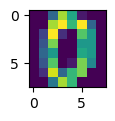

In [89]:
plt.figure(figsize = (1, 1))
plt.imshow(digits.images[0])
plt.show()

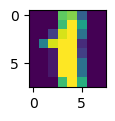

In [95]:
plt.figure(figsize = (1, 1))
plt.imshow(X[1].reshape(8, 8))
plt.show()

In [97]:
y[1], y[:30]

(1,
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 9]))

In [99]:
from sklearn.svm import SVC
# SVC가 판별 모형이나 probability = True proba 함수
model = SVC(probability = True).fit(X, y)

In [100]:
model.predict(X[0].reshape(1, -1))

array([0])

In [101]:
model.predict_proba(X[0].reshape(1, -1))

array([[9.90994391e-01, 1.85508958e-04, 4.68605853e-04, 9.37871162e-04,
        6.53409420e-04, 1.39737604e-03, 7.42708289e-04, 9.41800038e-04,
        7.55147408e-04, 2.92318217e-03]])

In [103]:
model.score(X, y)

0.996661101836394

In [104]:
# validation_curve 함수 이용하여 성능이 제일 좋은 파라미터값 도출

In [110]:
# logspace(n, m, k)
# 10의 -n² ~ 10의 m²
# 로그 간격으로 균등분포 k개 배열 생성
param_range = np.logspace(-6, -1, 10)
param_range

array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])

In [112]:
model = SVC(gamma = param_range[0]).fit(X, y)
model.score(X, y)

0.1018363939899833

In [114]:
%%time
from sklearn.model_selection import validation_curve
# 매개변수 10개 → 10개의 scores
train_scores, test_scores = validation_curve(SVC(),                     # 모형
                                             X, y,                      # 독립변수, 종속변수
                                             param_name  = 'gamma',     # 하이퍼 파라미터 설정
                                             param_range = param_range,
                                             cv          = 10,          # 교차 검증; cross validation
                                             scoring     = 'accuracy',  # score 기준
                                             n_jobs      = -1)          # 사용할 core 수
# cv = 10: 독립변수 10개로 나누고 [9:1 = train:test] 비율로 교차 검증

CPU times: total: 375 ms
Wall time: 19.6 s


In [116]:
train_scores.shape, test_scores.shape

((10, 10), (10, 10))

In [123]:
train_score_mean  = np.mean(train_scores, axis = 1) # train score 평균
train_score_std   = np.std(train_scores, axis = 1)  # train score 표준편차
test_score_mean   = np.mean(test_scores, axis = 1)  # test score 평균
test_score_std    = np.std(test_scores, axis = 1)   # test score 표준편차
print(train_score_mean)
print(test_score_mean)

[0.13836306 0.72045751 0.93439655 0.96939318 0.98775736 0.99789765
 1.         1.         1.         1.        ]
[0.13871508 0.70395717 0.90871198 0.94264742 0.95880509 0.97495655
 0.97496586 0.80522036 0.19709497 0.10463687]


In [124]:
test_score_mean.argmax()

6

In [125]:
param_range[test_score_mean.argmax()]

0.0021544346900318843

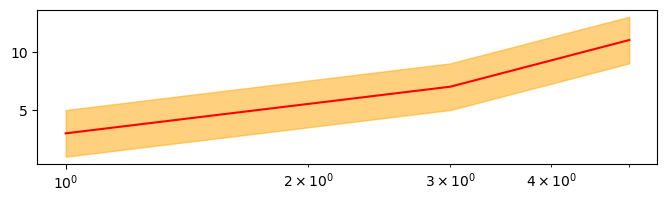

In [133]:
# 시각화
a = np.array([1, 3, 5])
b = np.array([3, 7, 11])
plt.figure(figsize = (8, 2))
plt.semilogx(a, b, color = "red")
plt.fill_between(a, b-2, b+2, alpha = 0.5, color = "orange")
plt.show()

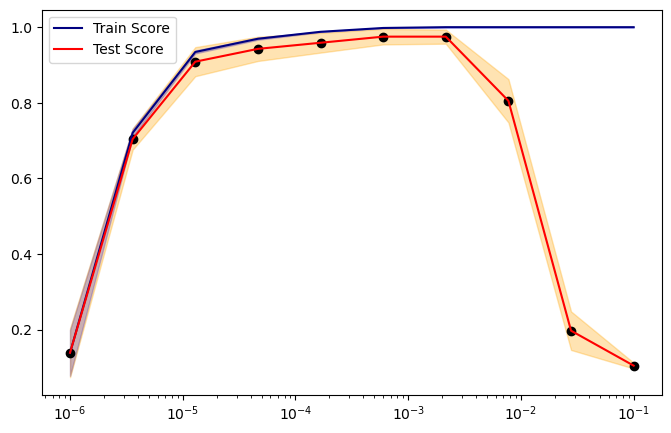

In [147]:
# gamma 값 바뀔 때마다 score 평균 높아짐
plt.figure(figsize = (8, 5))
# Train
plt.semilogx(param_range, 
             train_score_mean,
             label = "Train Score",
             color = "navy")
plt.fill_between(param_range,
                 train_score_mean - train_score_std,
                 train_score_mean + train_score_std,
                 alpha = 0.3,
                 color = "blue")
# Test
plt.semilogx(param_range, 
             test_score_mean,
             label = "Test Score",
             color = "red")
plt.fill_between(param_range,
                 test_score_mean - test_score_std,
                 test_score_mean + test_score_std,
                 alpha = 0.3,
                 color = "orange")
plt.scatter(param_range, test_score_mean, 
            c = 'k')
plt.legend(loc = "best")
plt.show()

In [149]:
# best_gamma로 모델 생성
best_gamma = param_range[test_score_mean.argmax()]
model = SVC(gamma = best_gamma).fit(X, y)

In [150]:
model.score(X, y)

1.0

## 2-2 GridSearchCV